In [3]:
# for data transformation
import numpy as np
# for visualizing the data
import matplotlib.pyplot as plt
# for opening the media file
import scipy.io.wavfile as wavfile
import librosa
import soundfile as sf

In [39]:
Fs1, aud1 = wavfile.read("../../sound-propagation-simulation\dataset/2023-03-21 17-46-59/StartPoint1_StartPoint6/record.3.1.wav")
Fs2, aud2 = wavfile.read("../../sound-propagation-simulation\dataset/2023-03-21 17-46-59/StartPoint1_StartPoint6/record.3.2.wav")
print(Fs1, Fs2)
print(aud1.shape, aud2.shape)
# print number of channels
print(aud1.ndim, aud2.ndim)

48000 48000
(160768,) (159744,)
1 1


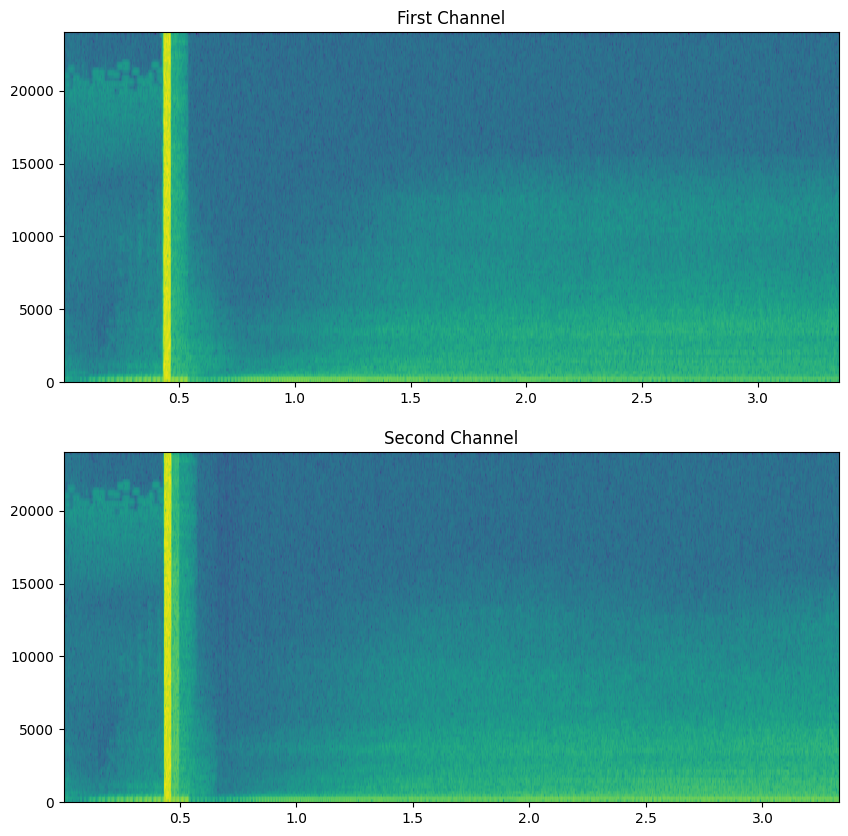

In [40]:
# plot the spectrogram of both channels
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.specgram(aud1[:int(Fs1*100)], Fs=Fs1)
plt.title('First Channel')
plt.subplot(2, 1, 2)
plt.specgram(aud2[:int(Fs2*100)], Fs=Fs2)
plt.title('Second Channel')
plt.show()

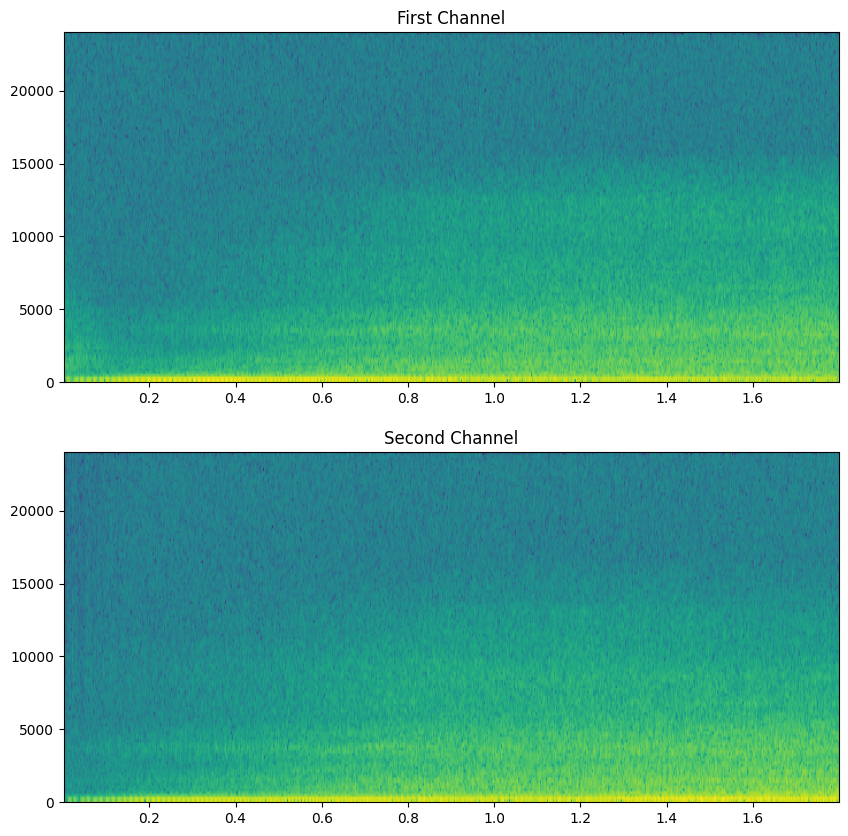

In [42]:
# detect the first loud noise
noise1_value = aud1.max()
noise1_index = np.where(aud1 == noise1_value)
noise2_value = aud2.max()
noise2_index = np.where(aud2 == noise2_value)
# crop the audio from the first loud noise to 2 seconds
after_noise_crop = 0.20
clip_length = 2
aud1_cropped = aud1[noise1_index[0][0]+int(after_noise_crop*Fs1):noise1_index[0][0]+clip_length*Fs1]
aud2_cropped = aud2[noise2_index[0][0]+int(after_noise_crop*Fs1):noise2_index[0][0]+clip_length*Fs2]
# plot the spectrogram of the channel with the first loud noise
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.specgram(aud1_cropped, Fs=Fs1)
plt.title('First Channel')
plt.subplot(2, 1, 2)
plt.specgram(aud2_cropped, Fs=Fs2)
plt.title('Second Channel')
plt.show()

In [33]:
# make the two cropped audio as one stereo audio
stereo_audio = np.array([aud1_cropped, aud2_cropped]).T
print(stereo_audio.shape)
# save the stereo audio
wavfile.write('stereo_audio.wav', Fs1, stereo_audio)

(88800, 2)
